# Expected variants
This script determines the expected number of variants per transcript and consequence

## Import modules

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as _stats
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportions_ztest

sns.set_context("talk")

## Load data

In [110]:
# Load mutational model summary statistics
mu = pd.read_csv("../outputs/mutational_model_stats.tsv", sep="\t")

In [111]:
# A function to retrieve the standard error of a proportion
def sem(p, n): return np.sqrt((p*(1-p))/n)

### Exclusions

In [112]:
# Exclude CpG transitions 
mu_cpg = mu[mu["variant_type"] != "CpG"].copy()

## Linear models

### No weighting

In [5]:
model = smf.wls("obs ~ mu", data = mu_cpg).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                       0.951
Model:                            WLS   Adj. R-squared:                  0.951
No. Observations:                 176   F-statistic:                     3372.
Covariance Type:            nonrobust   Prob (F-statistic):          7.84e-116
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0110      0.002      5.465      0.000       0.007       0.015
mu          2.554e+07    4.4e+05     58.067      0.000    2.47e+07    2.64e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Weight by number of possible variants

In [6]:
model = smf.wls("obs ~ mu", data = mu_cpg, weights=mu_cpg["pos"]).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                       0.959
Model:                            WLS   Adj. R-squared:                  0.959
No. Observations:                 176   F-statistic:                     4083.
Covariance Type:            nonrobust   Prob (F-statistic):          9.71e-123
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0121      0.002      5.790      0.000       0.008       0.016
mu          2.574e+07   4.03e+05     63.897      0.000    2.49e+07    2.65e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Weight by 1 / standard error of the proportion of observed variants

In [7]:
model = smf.wls("obs ~ mu", data = mu_cpg, weights=(1 / sem(mu_cpg["obs"],mu_cpg["pos"]))).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                       0.958
Model:                            WLS   Adj. R-squared:                  0.958
No. Observations:                 176   F-statistic:                     3991.
Covariance Type:            nonrobust   Prob (F-statistic):          6.45e-122
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0084      0.002      4.883      0.000       0.005       0.012
mu          2.613e+07   4.14e+05     63.176      0.000    2.53e+07    2.69e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Plot the best linear model (weight by number of possible variants)

In [8]:
fit = np.polyfit(mu_cpg["mu"], mu_cpg["obs"], 1, w = mu_cpg["pos"])
p = np.poly1d(fit)

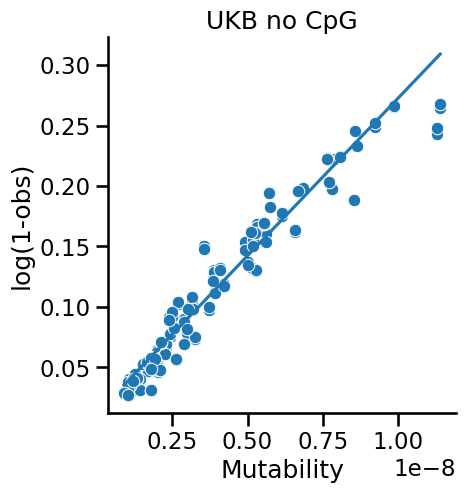

In [9]:
x = mu_cpg["mu"].sort_values()
y = p(x)

g = (sns.relplot(data = mu_cpg,
                 x = "mu",
                 y = "obs",
            )
)
(g.set(title="UKB no CpG",
       xlabel="Mutability",
       ylabel="log(1-obs)",
      )
)
plt.plot(x,y)

## Linear model on sqrt(mu)

### No weighting

In [10]:
model = smf.wls("obs ~ np.sqrt(mu)", data = mu_cpg,).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                       0.960
Model:                            WLS   Adj. R-squared:                  0.960
No. Observations:                 176   F-statistic:                     4156.
Covariance Type:            nonrobust   Prob (F-statistic):          2.20e-123
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0831      0.003    -26.682      0.000      -0.089      -0.077
np.sqrt(mu)  3291.2322     51.052     64.469      0.000    3190.472    3391.993
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Weight by number of possible variants

In [11]:
model = smf.wls("obs ~ np.sqrt(mu)", data = mu_cpg, weights=mu_cpg["pos"]).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                       0.969
Model:                            WLS   Adj. R-squared:                  0.968
No. Observations:                 176   F-statistic:                     5360.
Covariance Type:            nonrobust   Prob (F-statistic):          1.19e-132
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0877      0.003    -28.678      0.000      -0.094      -0.082
np.sqrt(mu)  3393.2236     46.350     73.209      0.000    3301.743    3484.704
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Weight by 1 / standard error of the proportion of observed variants

In [12]:
model = smf.wls("obs ~ np.sqrt(mu)", data = mu_cpg, weights=1/sem(mu_cpg["obs"],mu_cpg["pos"])).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    obs   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.961
No. Observations:                 176   F-statistic:                     4274.
Covariance Type:            nonrobust   Prob (F-statistic):          2.13e-124
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0826      0.003    -28.436      0.000      -0.088      -0.077
np.sqrt(mu)  3288.9283     50.310     65.374      0.000    3189.633    3388.224
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot the best sqrt linear model (weight by number of possible variants)

In [13]:
fit = np.polyfit(np.sqrt(mu_cpg["mu"]), mu_cpg["obs"], 1, w = mu_cpg["pos"])
p = np.poly1d(fit)

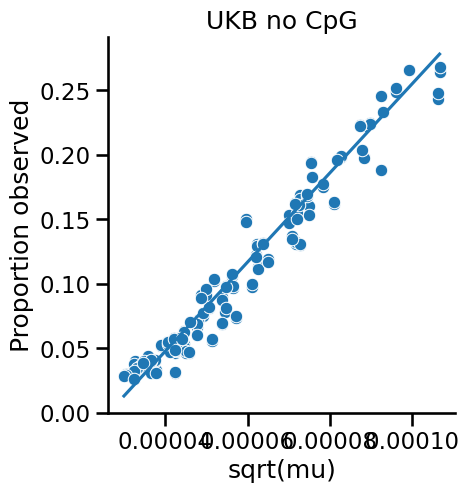

In [14]:
x = np.sqrt(mu_cpg["mu"]).sort_values()
y = p(x)

g = (sns.relplot(data = mu_cpg,
                 x = np.sqrt(mu_cpg["mu"]),
                 y = "obs",
            )
)
(g.set(title="UKB no CpG",
       xlabel="sqrt(mu)",
       ylabel="Proportion observed",
      )
)
plt.plot(x,y)

## Log models

### No weighting

In [15]:
model = smf.wls("np.log(1-obs) ~ mu", data = mu_cpg).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(1 - obs)   R-squared:                       0.956
Model:                            WLS   Adj. R-squared:                  0.956
No. Observations:                 176   F-statistic:                     3821.
Covariance Type:            nonrobust   Prob (F-statistic):          2.42e-120
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0050      0.002     -2.289      0.023      -0.009      -0.001
mu          -2.96e+07   4.79e+05    -61.817      0.000   -3.05e+07   -2.87e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-15. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Weight by number of possible variants

In [16]:
model = smf.wls("np.log(1-obs) ~ mu", data = mu_cpg, weights=mu_cpg["pos"]).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(1 - obs)   R-squared:                       0.965
Model:                            WLS   Adj. R-squared:                  0.964
No. Observations:                 176   F-statistic:                     4739.
Covariance Type:            nonrobust   Prob (F-statistic):          3.71e-128
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0055      0.002     -2.419      0.017      -0.010      -0.001
mu         -3.002e+07   4.36e+05    -68.840      0.000   -3.09e+07   -2.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Weight by 1 / standard error of the observed proportion

In [17]:
model = smf.wls("np.log(1-obs) ~ mu", data = mu_cpg, weights=1/sem(mu_cpg["obs"], mu_cpg["pos"])).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(1 - obs)   R-squared:                       0.963
Model:                            WLS   Adj. R-squared:                  0.963
No. Observations:                 176   F-statistic:                     4539.
Covariance Type:            nonrobust   Prob (F-statistic):          1.39e-126
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0027      0.002     -1.445      0.150      -0.006       0.001
mu         -3.018e+07   4.48e+05    -67.370      0.000   -3.11e+07   -2.93e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Plot the best log model (weight by number of possible variants)

In [18]:
fit = np.polyfit(mu_cpg["mu"], np.log(1 - mu_cpg["obs"]), 1, w = mu_cpg["pos"])
p = np.poly1d(fit)

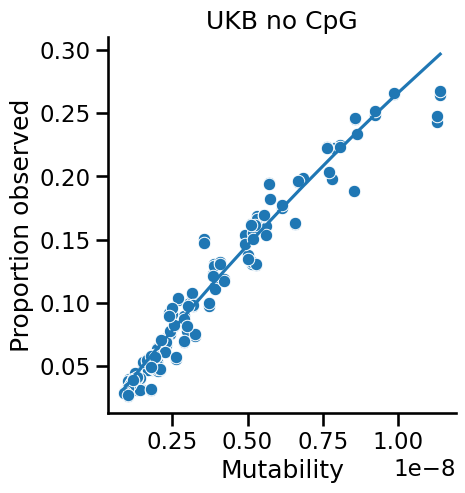

In [19]:
x = mu_cpg["mu"].sort_values()
y = 1 - np.exp(p(x))

g = (sns.relplot(data = mu_cpg,
                 x = "mu",
                 y = "obs",
            )
)
(g.set(title="UKB no CpG",
       xlabel="Mutability",
       ylabel="Proportion observed",
      )
)
plt.plot(x,y)

## Calculate expected variants per transcript and context

In [56]:
def get_expected(df, x):
    """ 
    Get the expected proportion of variants per transcript and consequence. 
    x is a lambda function used to predict the expected value.
    """
    df = (df.assign(
            prop_obs=lambda x: x["n_obs"] / x["n_pos"],
            se_prop_obs=lambda x: np.sqrt((x["prop_obs"] * (1 - x["prop_obs"])) / x["n_pos"]),
            prop_exp=x,
            se_prop_exp=lambda x: np.sqrt((x["prop_exp"] * (1 - x["prop_exp"])) / x["n_pos"]),
            n_exp=lambda x: np.round(x["n_pos"] * x["prop_exp"], 2),
            oe=lambda x: x["n_obs"] / x["n_exp"],
            oe_ci_upper=lambda x: (x["prop_obs"] + _stats.norm.ppf(0.975) * (x["se_prop_obs"])) / x["prop_exp"],
            ee_ci_lower=lambda x: (x["prop_exp"] - _stats.norm.ppf(0.975) * (x["se_prop_exp"])) / x["prop_exp"],
            oe_diff=lambda x: (x["oe"] - x["ee_ci_lower"]),
        )
        .set_index(["enst","csq"])
        .unstack(fill_value=0).stack().reset_index()
    )
    # Z scores and p-values
    df["z"] = df.apply(
        lambda x: (
            proportions_ztest(
                x["n_obs"],
                x["n_pos"],
                x["prop_exp"],
                alternative="smaller",
                prop_var=x["prop_exp"],
            )[0]
        ),
        axis=1,
    )
    df["p"] = df.apply(
        lambda x: proportions_ztest(
            x["n_obs"],
            x["n_pos"],
            x["prop_exp"],
            alternative="smaller",
            prop_var=x["prop_exp"],
        )[1],
        axis=1,
    )
    return df

### Choice of models

In [118]:
# Linear model
fit = np.polyfit(mu_cpg["mu"], mu_cpg["obs"], 1, w = mu_cpg["pos"])
lm_p = np.poly1d(fit)

# Square-root model
fit = np.polyfit(np.sqrt(mu_cpg["mu"]), mu_cpg["obs"], 1, w = mu_cpg["pos"])
sqrt_p = np.poly1d(fit)

# Log model
fit = np.polyfit(mu_cpg["mu"], np.log(1 - mu_cpg["obs"]), 1, w = mu_cpg["pos"])
log_p = np.poly1d(fit)

# Log model including CpG data
mu_non_sat = mu[mu["obs"] != 1]
fit = np.polyfit(mu_non_sat["mu"], np.log(1 - mu_non_sat["obs"]), 1, w = mu_non_sat["pos"])
cpg_log_p = np.poly1d(fit)

### Get the summary data of possible and observed variants

In [146]:
# No CpG variants
df_cpg = pd.read_csv("../outputs/observed_variants_stats_no_cpg.tsv", sep="\t")

### Calculate the number of expected variants using each model

In [ ]:
# No CpGs
df_cpg_lm = get_expected(df=df_cpg, x=lambda x: lm_p(x["mu"])) # Linear model
df_cpg_sqrt = get_expected(df=df_cpg, x=lambda x: sqrt_p(np.sqrt(x["mu"]))) # Sqrt model
df_cpg_log = get_expected(df=df_cpg, x=lambda x: 1 - np.exp(log_p(x["mu"]))) # Log model

## Plots

### Expected and observed variants per transcript

In [142]:
def plot_obs_exp_per_transcript(df):
    """Plot number observed vs number expected per transcript
    """
    
    g = sns.lmplot(
        data=df[df.enst != "ENST00000589042"], # Exclude TTN for visual clarity
        x="n_exp",
        y="n_obs",
        col="csq",
        col_order=["synonymous", "missense", "nonsense"],
        facet_kws={"sharex":False, "sharey":False},
        ci=None,
        robust=True
    )
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels("Expected", "Observed")
    for ax in g.axes[0]:
        ax.axline((0,0), (1,1), color="grey", linestyle="--")
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle("Variants per transcript")
    
    return g

Text(0.5, 0.98, 'Variants per transcript (linear model)')

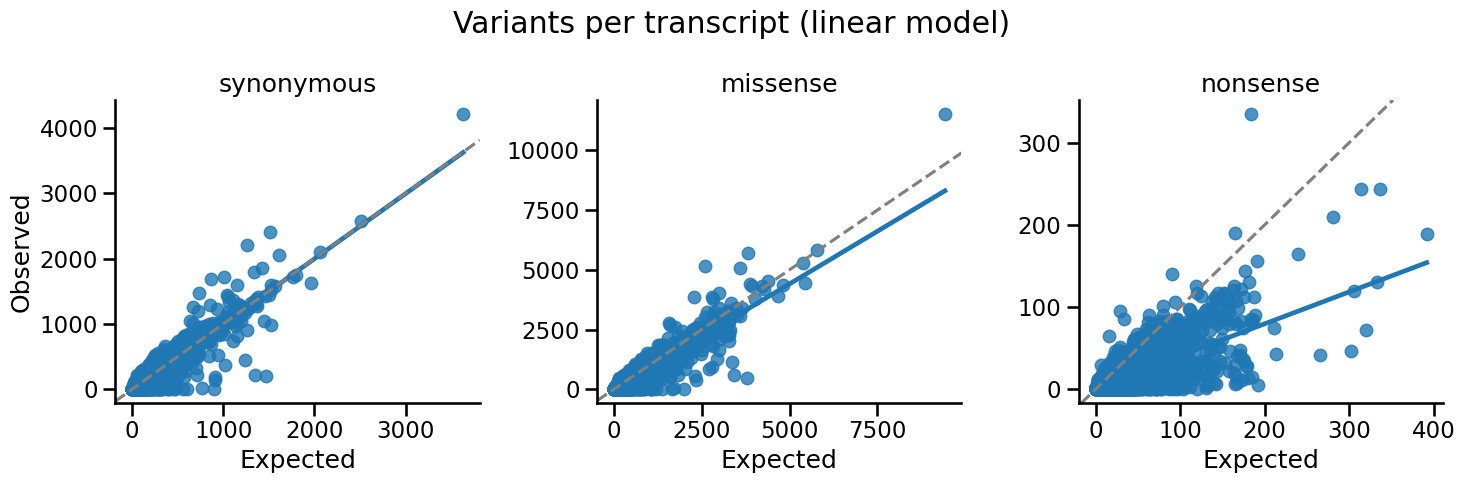

In [143]:
g = plot_obs_exp_per_transcript(df_cpg_lm)
g.fig.suptitle("Variants per transcript (linear model)")

Text(0.5, 0.98, 'Variants per transcript (sqrt model)')

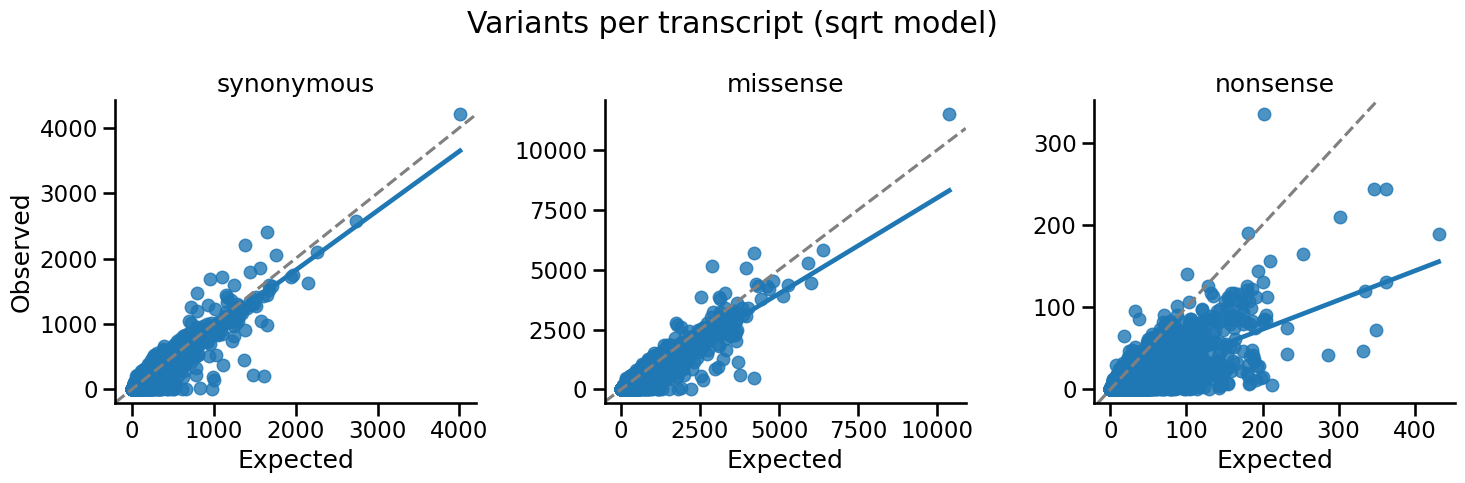

In [144]:
g = plot_obs_exp_per_transcript(df_cpg_sqrt)
g.fig.suptitle("Variants per transcript (sqrt model)")

Text(0.5, 0.98, 'Variants per transcript (log model)')

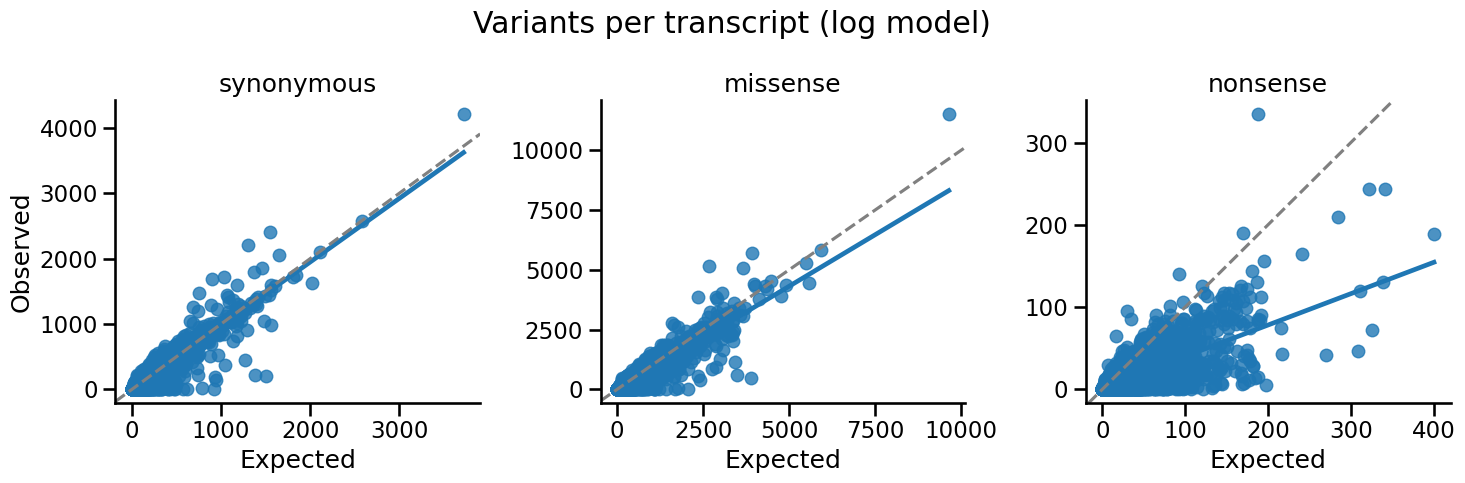

In [145]:
g = plot_obs_exp_per_transcript(df_cpg_log)
g.fig.suptitle("Variants per transcript (log model)")

## Save expected variants to output
On the basis of the figures above, the **best model** for predicting the expected number of variants (excluding CpG transitions) is a **simple linear model of obs vs mu**, weighted by the number of possible variants per context. The output of this expectation model is saved below.

In [147]:
df_cpg_lm.to_csv("../outputs/expected_variants_stats_no_cpg.tsv", sep="\t", index=False)

In [151]:
dfg = pd.read_csv("../outputs/expected_variants_stats_no_cpg.tsv", sep="\t")

## O/E distributions

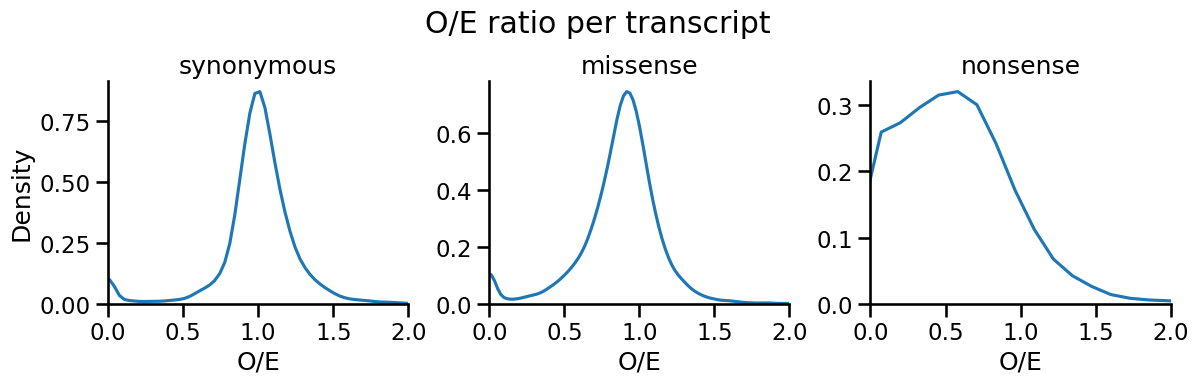

In [152]:
# Plot distributions of O/E ratio per transcript
g = sns.displot(
    data=dfg,
    kind="kde",
    x="oe",
    col="csq",
    col_order=["synonymous", "missense", "nonsense"],
    facet_kws={"sharex":False, "sharey":False},
    height=4,
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("O/E")
g.set(xlim=(0, 2))
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("O/E ratio per transcript");

## O/E upper confidence interval distribution

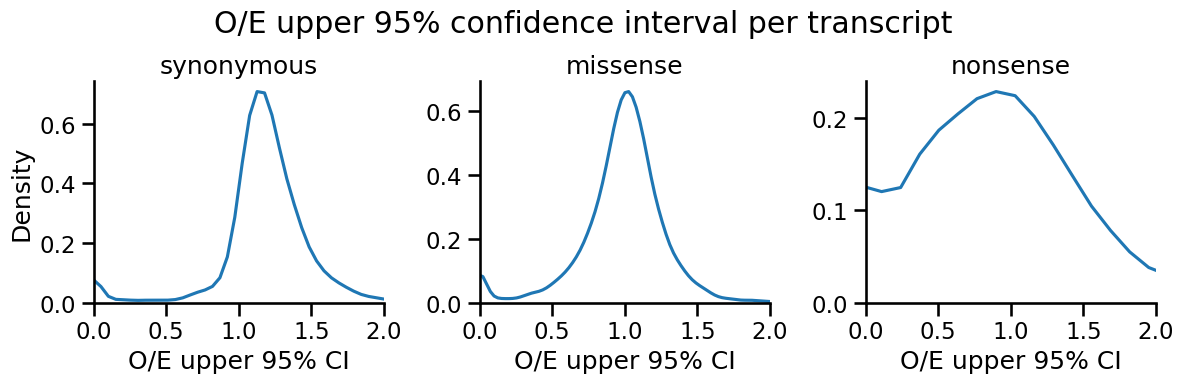

In [153]:
# Plot distributions of O/E upper confidence interval per transcript
g = sns.displot(
    data=dfg,
    kind="kde",
    x="oe_ci_upper",
    col="csq",
    col_order=["synonymous", "missense", "nonsense"],
    facet_kws={"sharex": False, "sharey": False},
    height=4,
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("O/E upper 95% CI")
g.set(xlim=(0, 2))
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("O/E upper 95% confidence interval per transcript");

## O/E difference from E/E lower confidence interval

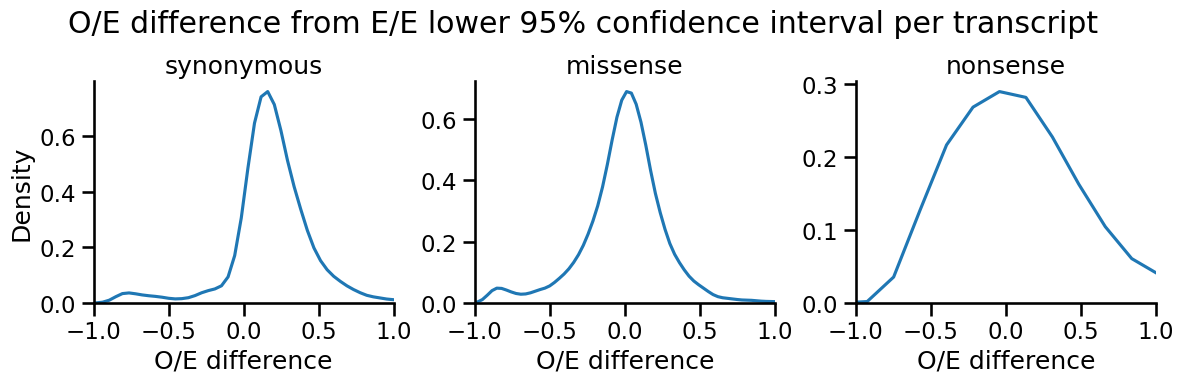

In [154]:
# Plot distributions of O/E difference from E/E lower 95% confidence interval per transcript
g = sns.displot(
    data=dfg,
    kind="kde",
    x="oe_diff",
    col="csq",
    col_order=["synonymous", "missense", "nonsense"],
    facet_kws={"sharex": True, "sharey": False},
    height=4,
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("O/E difference")
g.set(xlim=(-1, 1))
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("O/E difference from E/E lower 95% confidence interval per transcript");

## N expected by consequence

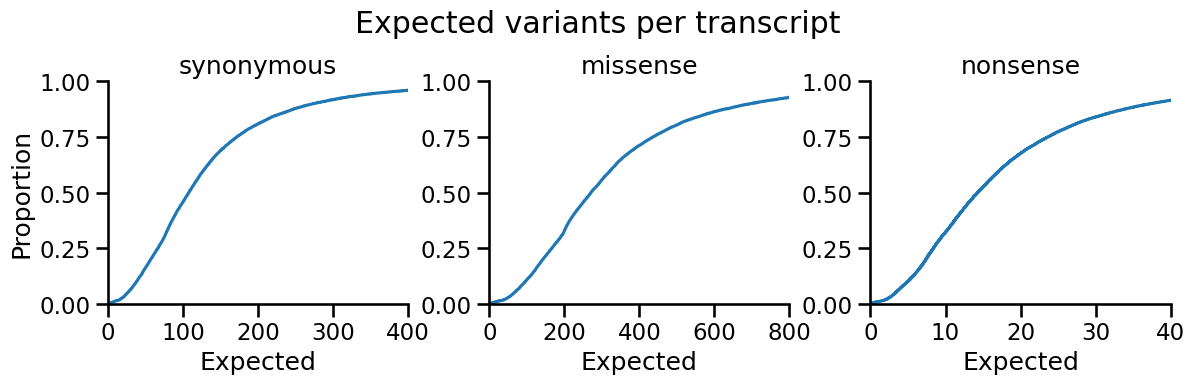

In [155]:
# Plot distributions of n_exp per transcript
sns.set_context("talk")
g = sns.displot(
    data=dfg,
    kind="ecdf",
    x="n_exp",
    col="csq",
    col_order=["synonymous", "missense", "nonsense"],
    facet_kws={"sharex": False, "sharey": False},
    height=4,
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Expected")

# Set x-axis limits
g.axes[0, 0].set_xlim(0, 400)
g.axes[0, 1].set_xlim(0, 800)
g.axes[0, 2].set_xlim(0, 40)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Expected variants per transcript");

## One-sample Z score

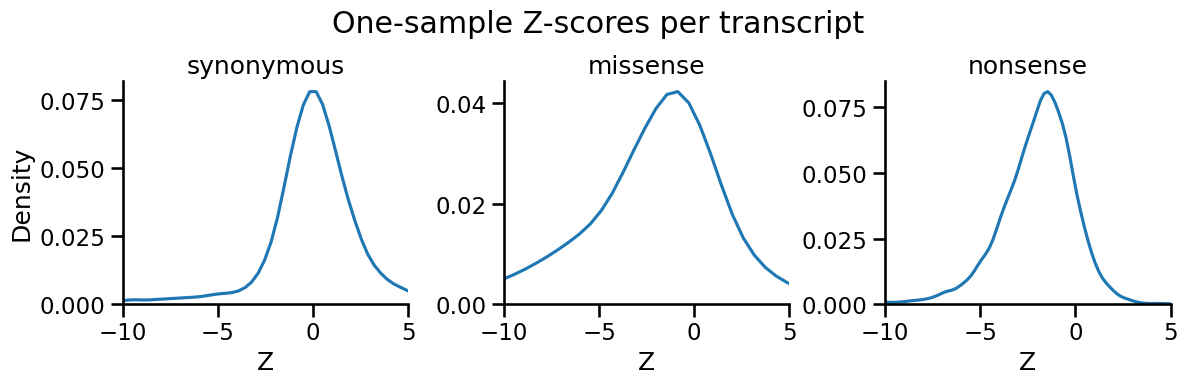

In [156]:
# Plot distributions of one-sample Z scores per transcript
sns.set_context("talk")
g = sns.displot(
    data=dfg,
    kind="kde",
    x="z",
    col="csq",
    col_order=["synonymous", "missense", "nonsense"],
    facet_kws={"sharex": True, "sharey": False},
    height=4,
)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Z")
g.set(xlim=(-10, 5))
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("One-sample Z-scores per transcript");